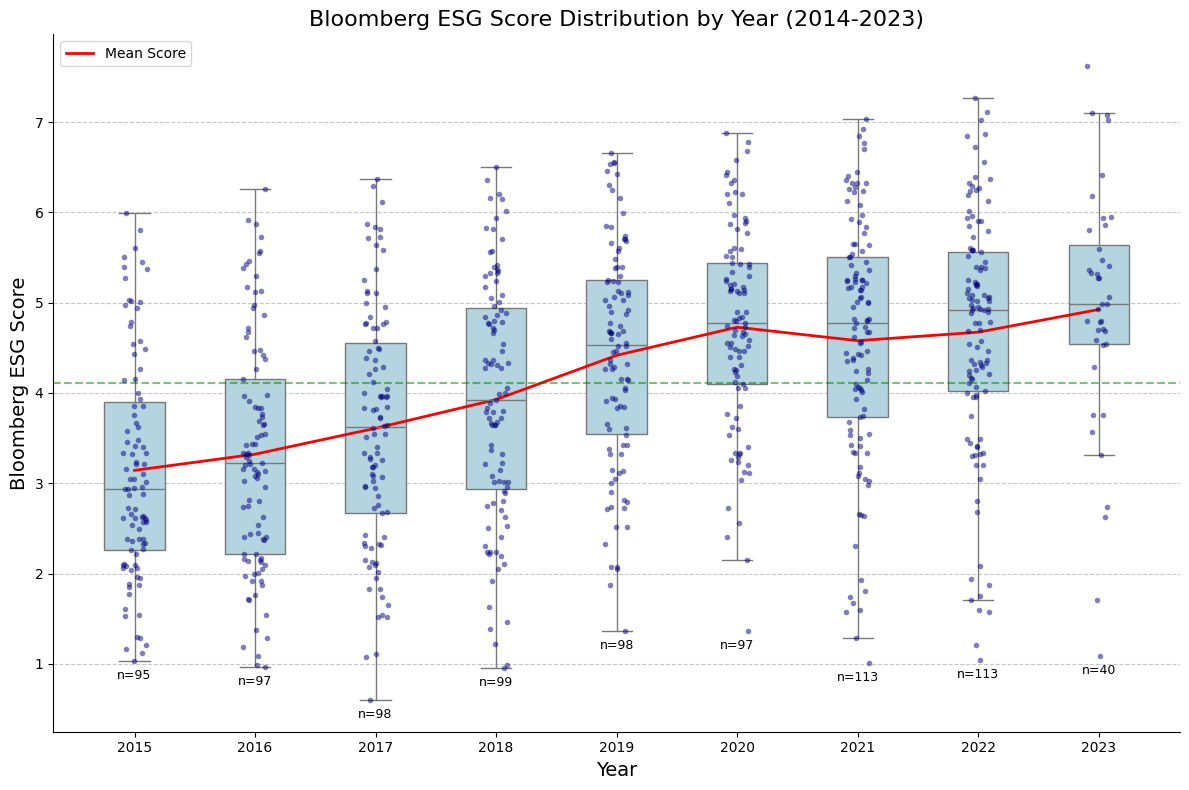

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('energy_cleaned.csv')

# Convert 'BESG ESG Score' to numeric, forcing errors to NaN
df['BESG ESG Score'] = pd.to_numeric(df['BESG ESG Score'], errors='coerce')

# Filter only rows with BESG ESG Score data
df_filtered = df.dropna(subset=['BESG ESG Score'])

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the box plot without outliers
ax = sns.boxplot(x='Year', y='BESG ESG Score', data=df_filtered, 
                 color='lightblue', width=0.5, showfliers=False)

# Add individual data points with jitter
sns.stripplot(x='Year', y='BESG ESG Score', data=df_filtered, 
              size=4, color='navy', alpha=0.5, jitter=True)

# Add a trend line showing the mean score per year
means = df_filtered.groupby('Year')['BESG ESG Score'].mean()
plt.plot(range(len(means)), means.values, 'r-', linewidth=2, label='Mean Score')

# Enhance the plot with labels and title
plt.title('Bloomberg ESG Score Distribution by Year (2014-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bloomberg ESG Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate with some key statistics
for i, year in enumerate(sorted(df_filtered['Year'].unique())):
    year_data = df_filtered[df_filtered['Year'] == year]['BESG ESG Score']
    if not year_data.empty:
        plt.annotate(f'n={len(year_data)}', 
                    xy=(i, year_data.min() - 0.2), 
                    ha='center', fontsize=9)

# Add a horizontal line at the overall mean
plt.axhline(y=df_filtered['BESG ESG Score'].mean(), color='green', 
           linestyle='--', alpha=0.5, label='Overall Mean')

# Improve aesthetics
sns.despine(left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
# Filter out Large Cap and Mega Cap companies and create a new DataFrame
df_large_cap = df_filtered[df_filtered['Market Cap Category'].isin(['Large Cap', 'Mega Cap'])]
df_large_cap.shape

(412, 141)

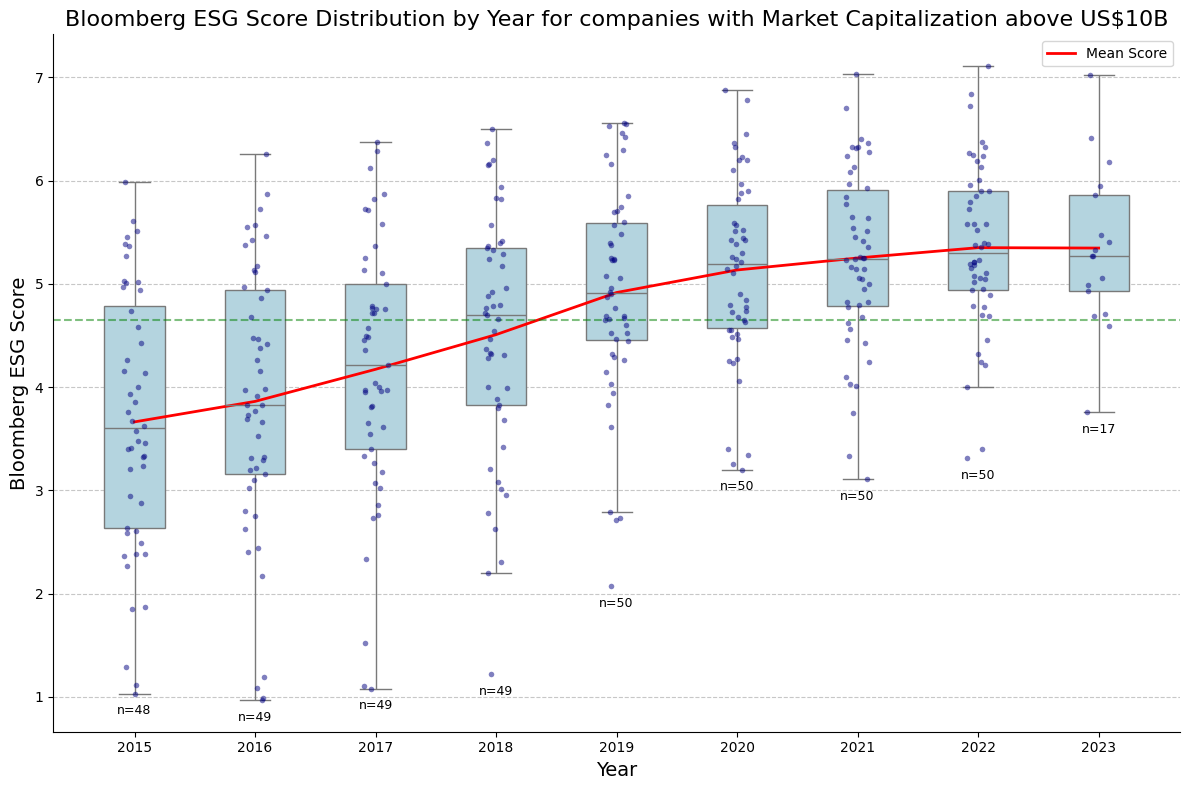

In [25]:
# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the box plot without outliers
ax = sns.boxplot(x='Year', y='BESG ESG Score', data=df_large_cap, 
                 color='lightblue', width=0.5, showfliers=False)

# Add individual data points with jitter
sns.stripplot(x='Year', y='BESG ESG Score', data=df_large_cap, 
              size=4, color='navy', alpha=0.5, jitter=True)

# Add a trend line showing the mean score per year
means = df_large_cap.groupby('Year')['BESG ESG Score'].mean()
plt.plot(range(len(means)), means.values, 'r-', linewidth=2, label='Mean Score')

# Enhance the plot with labels and title
plt.title('Bloomberg ESG Score Distribution by Year for companies with Market Capitalization above US$10B', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bloomberg ESG Score', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate with some key statistics
for i, year in enumerate(sorted(df_large_cap['Year'].unique())):
    year_data = df_large_cap[df_large_cap['Year'] == year]['BESG ESG Score']
    if not year_data.empty:
        plt.annotate(f'n={len(year_data)}', 
                    xy=(i, year_data.min() - 0.2), 
                    ha='center', fontsize=9)

# Add a horizontal line at the overall mean
plt.axhline(y=df_large_cap['BESG ESG Score'].mean(), color='green', 
           linestyle='--', alpha=0.5, label='Overall Mean')

# Improve aesthetics
sns.despine(left=False, bottom=False)
plt.tight_layout()

# Show the plot
plt.show()